In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import json
from copy import deepcopy
import matplotlib.pyplot as plt
import lib.galaxy_utilities as gu

In [3]:
plt.style.use('seaborn-dark')

In [4]:
with open('lib/best-classifications.json') as f:
    best_cls = {
        k: gu.classifications.query(
            'classification_id == {}'.format(v)
        ).iloc[0]['user_name']
        for k, v in json.load(f).items()
    }

In [5]:
x = np.array([i for i in best_cls.values()])
k = np.unique(x)
n_best = pd.Series([(x == i).sum() for i in k], index=k).sort_values()

In [6]:
a = np.argsort(n_best.values)[-20:]
classification_counts = gu.classifications['user_name'].value_counts().loc[n_best.index]

Who was most likely to give the best classification of a galaxy? (_hint: there's a familiar name at the top..._)

In [11]:
n_best.iloc[a[::-1]]

tingard                               16
pangeli5                              12
Linda_J._Berkel                        8
framosuw                               5
cmk24                                  5
jnarayanbvg                            5
ywan3529                               4
ShirleyL                               4
rmacmi2                                4
acapirala                              4
equidad1                               4
ElisabethB                             4
homant                                 3
peakscience7                           3
not-logged-in-7293e12da8eb5881cfe1     3
Quarkgc                                3
barrowwright                           3
thedarktree                            3
databanana                             3
not-logged-in-db3aef817c33e4671065     3
dtype: int64

Who submitted the most classifications?

In [10]:
classification_counts.sort_values(ascending=False).head(10)

equidad1                              138
ElisabethB                            133
pangeli5                              101
acapirala                             101
jnarayanbvg                            80
not-logged-in-7293e12da8eb5881cfe1     67
ShirleyL                               51
tingard                                49
clars915                               42
Dynamatt                               38
Name: user_name, dtype: int64

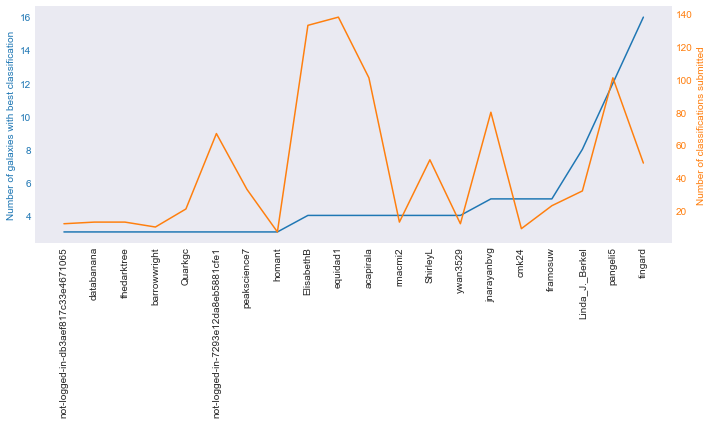

In [13]:
fig, ax0 = plt.subplots(figsize=(10,6))
color0 = 'C0'
# ax0.set_xlabel('time (s)')
ax0.set_ylabel('Number of galaxies with best classification', color=color0)
ax0.plot(n_best.iloc[a], color=color0)
ax0.tick_params(axis='y', labelcolor=color0)
plt.sca(ax0)
plt.xticks(np.arange(len(a)), n_best.iloc[a].index, rotation='vertical');

ax1 = ax0.twinx()  # instantiate a second axes that shares the same x-axis

color1 = 'C1'
ax1.set_ylabel('Number of classifications submitted', color=color1)  # we already handled the x-label with ax1
ax1.plot(classification_counts.loc[n_best.iloc[a].index], color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Well it looks like I'm quite good at this project... funny that!